-*- coding: utf-8 -*-
@author: Residencia Tech Analista Dados - Luciana Lanzoni Menges (10/2022)

# RESIDÊNCIA TECH
*** PROJETO OLIST ***

#Sobre o banco de dados: 
Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos dos marketplaces brasileiros. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist. Veja mais no site: www.olist.com


## Inicialização

Importando bibliotecas e a carga inicial dos dados para análise

In [1]:
#Importando a biblioteca Pandas
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Lendo os arquivos de Vendas Olist
Os arquivos .csv são referentes a vendas reais de e-commerce. 

* customers = Informações sobre o cliente e sua localização. (99.441 linhas e 5 colunas)

In [2]:
customers = pd.read_csv ('D:\Harve Residencia Tech\Projetos\Projeto Olist\Projeto Olist Script\Tabelas\olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


* geolocation = Informações de CEPs brasileiros e suas coordenadas latitude/longitude. (1.000.163 linhas, 5 colunas)

In [4]:
geolocation = pd.read_csv ('Tabelas\olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


* order_items: Informações sobre a quantidade de itens do pedido e os preços do produto e do frete individual. (112.650 linhas, 7 colunas)

In [6]:
orders_items = pd.read_csv ('Tabelas\olist_order_items_dataset.csv')
orders_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


* order_payment: Informações de opções de pagamento de pedidos. (103.886 linhas, 5 colunas)

In [8]:
order_payment = pd.read_csv ('Tabelas\olist_order_payments_dataset.csv')
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


* order_reviews: Dados de avaliações feitas pelos clientes. (99.224 linhas, 7 colunas)

In [10]:
order_reviews = pd.read_csv('Tabelas\olist_order_reviews_dataset.csv')
order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [11]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


* orders: Dados a respeito do pedido (estampa de tempo da compra, aprovação, entrega para logística, recebimento, previsão de entrega). (99.441 linhas, 8 colunas)

In [12]:
orders = pd.read_csv('Tabelas\olist_orders_dataset.csv')
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


* products: Informações sobre os produtos vendidos. (32.951 linhas, 9 colunas)

In [14]:
products = pd.read_csv('Tabelas\olist_products_dataset.csv')
products.head(10) 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


* sellers: informações sobre os vendedores. (3.095 linhas, 4 colunas)

In [16]:
sellers = pd.read_csv('Tabelas\olist_sellers_dataset.csv')
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [17]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


* product_category: tradução das categorias dos produtos. (71 linhas, 2 colunas)

In [18]:
product_category = pd.read_csv('Tabelas\product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Limpeza do Conjunto

### Alteração do tipo de coluna

- DataFrame: orders_items. Alteração do tipo da coluna orders_items[shipping_limit_date] para DATETIME.

In [20]:
orders_items['shipping_limit_date'] = pd.to_datetime(orders_items['shipping_limit_date'])
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


- DataFrame: orders_reviews. Alteração do tipo das colunas orders_reviews[review_creation_date] e orders_review[review_answer_timestamp] para DATETIME.

In [21]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


- DataFrame: orders. Alterando o tipo de cinco colunas para DATETIME

In [22]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Análise e Limpeza da tabela 'Orders' (Pedidos)

In [23]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


#### Contando valores nulos, unique e a frequência do valor mais comum
- Observações:
     * Valores nulos em três colunas: order_approved_at, order_delivered_carrier_date e order_delivered_customer_date
    * Os pedidos têm oito diferentes tipos de status. 

In [24]:
orders.describe(include=[object])

,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
freq,1,1,96478


In [25]:
orders.describe(datetime_is_numeric=True)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


- Quantidade de valores nulos nas colunas da Tabela 'Orders'

In [26]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

        * Estes valores nulos em três colunas indica que o dataset é uma fotografia de um determinado momento. Ou seja não de um período com os processos todos fechados.

- Tipos de Status

In [27]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

- Quantidade de pedidos por tipo de status

In [28]:
orders.groupby('order_status').order_id.count().sort_values(ascending = False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


## Backlog´s demandados pelo Product Owner

- Tempo de entrega dos pedidos

In [29]:
# Acrescentando uma coluna com o tempo de entrega dos produtos em dias
orders['tempo_entrega']= round((orders.order_delivered_customer_date - orders.order_approved_at) / np.timedelta64(1,'D'),0)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


* Colocando filtro para retirar os pedidos cancelados, datas vazias das colunas pedido aprovado e entraga ao cliente.

In [30]:
orders_validas = orders[(orders.order_status != 'canceled') & (orders.order_approved_at.notnull()) & (orders.order_delivered_customer_date.notnull())]
orders_validas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [31]:
print(orders.shape)
print(orders_validas.shape)

(99441, 9)
(96456, 9)


In [32]:
orders_validas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96456 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96456 non-null  object        
 1   customer_id                    96456 non-null  object        
 2   order_status                   96456 non-null  object        
 3   order_purchase_timestamp       96456 non-null  datetime64[ns]
 4   order_approved_at              96456 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96456 non-null  datetime64[ns]
 8   tempo_entrega                  96456 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 7.4+ MB


- Gráfico com a distribuição dos tempos de entrega dos pedidos.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


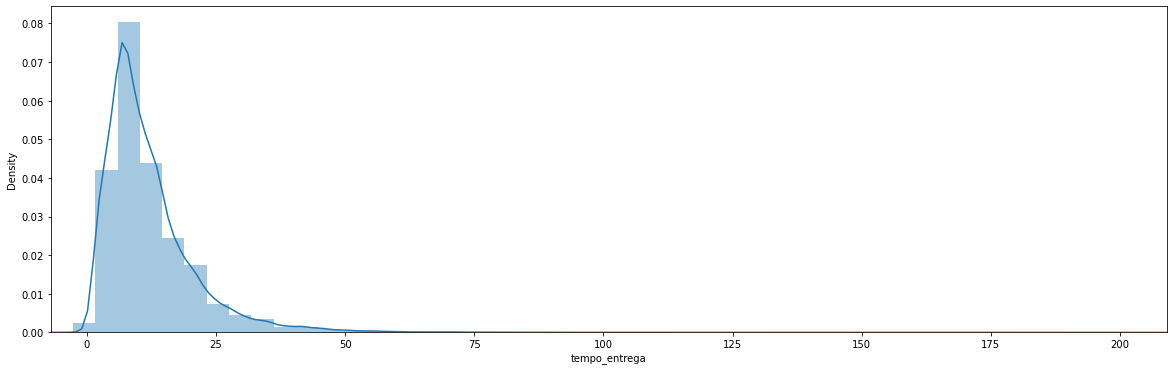

In [33]:

plt.rcParams["figure.figsize"]= (20,6)
plt.subplot(1,1,1)
sns.distplot(orders_validas['tempo_entrega']) #, kde = False
plt.xlim(left= -7,right=209)
plt.savefig('GraficoTempoEntrega.png', dpi= 600, bbox_inches = 'tight')
plt.show()

        * 92,8% dos pedidos são entregues até o 25o.dia após a aprovação do pedido.

In [34]:
ped_tempo_entrega = orders_validas.groupby('tempo_entrega')['order_id'].count().reset_index()
total_pedidos = ped_tempo_entrega['order_id'].sum()

ped_tempo_entrega['%_do_total_ped']= round((ped_tempo_entrega['order_id']/ total_pedidos *100),3)

ped_tempo_entrega.head(15)

,tempo_entrega,order_id,%_do_total_ped
0,-7.0,1,0.001
1,-5.0,7,0.007
2,-4.0,2,0.002
3,-3.0,4,0.004
4,-2.0,8,0.008
5,-1.0,16,0.017
6,0.0,96,0.100
7,1.0,869,0.901
8,2.0,3540,3.670
9,3.0,3731,3.868


* Verificando os outliers.

In [35]:
print(orders_validas.tempo_entrega.min())
print(orders_validas.tempo_entrega.max())

-7.0
209.0


* Temos 38 pedidos com tempo de entrega negativo. 

In [36]:
print(orders_validas[orders_validas.tempo_entrega < 0].shape)

(38, 9)


In [37]:
orders_validas[orders_validas.tempo_entrega < 0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_entrega
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,-1.0
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,-2.0
1986,6e57e23ecac1ae881286657694444267,2dda54e25d0984e12705c84d4030e6e0,delivered,2018-08-09 17:36:47,2018-08-20 15:55:42,2018-08-14 13:26:00,2018-08-17 16:45:45,2018-09-06,-3.0
3659,f222c56f035b47dfa1e069a88235d730,b74ca180d63f9ae0443e4e13a2f5bdaf,delivered,2018-01-30 09:43:45,2018-02-04 23:31:47,2018-01-31 19:48:44,2018-02-01 20:10:38,2018-02-15,-3.0
11738,cf72398d0690f841271b695bbfda82d2,2b7fff075bda701552485ef3f0810257,delivered,2017-09-01 18:45:33,2017-09-13 22:04:39,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21,-2.0


    * O tempo negativo se deve ao fato de que alguns pedidos foram aprovados após a entrega. 

In [38]:
orders_validas[orders_validas.tempo_entrega >= 40].shape

(1753, 9)

    * 1753 ou 1,82% do total de pedidos são entregues após 40 dias.

#### 1. Qual é o tempo médio/mediano desde a aprovação do pedido até a sua entrega?

In [39]:
# TEMPO MÉDIO EM DIAS TABELA ORIGINAL
orders.tempo_entrega.mean()

12.119891770852771

In [40]:
# TEMPO MÉDIO EM DIAS, SEM OS VALORES NEGATIVOS E SEM CANCELADOS
orders_validas[orders_validas.tempo_entrega >= 0].tempo_entrega.mean()

12.12516335124147

In [41]:
# TEMPO MEDIANO EM DIAS TABELA ORIGINAL
orders.tempo_entrega.median()

10.0

In [42]:
# TEMPO MEDIANO EM DIAS, SEM OS VALORES NEGATIVOS E SEM CANCELADOS
orders_validas[orders_validas.tempo_entrega >= 0].tempo_entrega.median()

10.0

#### 2a. Qual o mês com maior quantidade de vendas (em número de pedido)

    - Criando um novo dataframe com coluna de mês e ano da data de compra do pedido, além dos pedidos.

In [43]:
meses_compras = pd.DataFrame()
meses_compras['mes'] = orders['order_purchase_timestamp'].dt.month
meses_compras['ano'] = orders['order_purchase_timestamp'].dt.year
meses_compras['Qtidade_pedidos'] = orders['order_id']
meses_compras = meses_compras.groupby(['ano','mes'])['Qtidade_pedidos'].count().reset_index()

meses_compras['ano_mes'] = meses_compras['ano'].astype(str) + '/' + meses_compras['mes'].astype(str)

meses_compras.head()

,ano,mes,Qtidade_pedidos,ano_mes
0,2016,9,4,2016/9
1,2016,10,324,2016/10
2,2016,12,1,2016/12
3,2017,1,800,2017/1
4,2017,2,1780,2017/2


    - Visualização da quantidade de vendas por Mês

<function matplotlib.pyplot.show(close=None, block=None)>

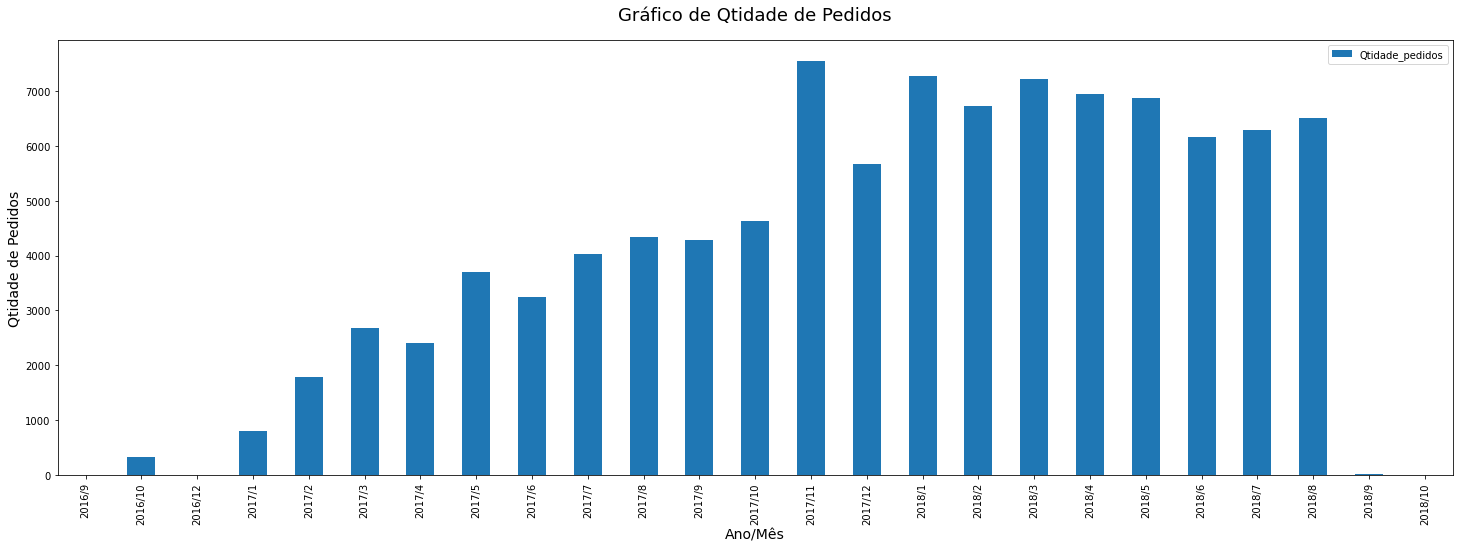

In [44]:
grafico_pedidos = meses_compras.plot(kind='bar', x='ano_mes', y='Qtidade_pedidos', figsize=(25,8))

plt.title('Gráfico de Qtidade de Pedidos', fontsize=18, pad=20)
plt.xlabel('Ano/Mês', size =14)
plt.ylabel('Qtidade de Pedidos', size=14,)
plt.show


In [45]:
meses_compras.iloc[meses_compras[['Qtidade_pedidos']].idxmax()]

,ano,mes,Qtidade_pedidos,ano_mes
13,2017,11,7544,2017/11


#### 2b. Qual o mês com os maiores pagamentos (pagamentos/Valores).

In [46]:
meses_pagtos = pd.DataFrame()
meses_pagtos['mes'] = orders['order_purchase_timestamp'].dt.month
meses_pagtos['ano'] = orders['order_purchase_timestamp'].dt.year
meses_pagtos['Total_Vendas'] = order_payment['payment_value']

meses_pagtos = meses_pagtos.groupby(['ano','mes'])['Total_Vendas'].sum().reset_index()

meses_pagtos['ano_mes1'] = meses_pagtos['ano'].astype(str) + '/' + meses_pagtos['mes'].astype(str)

meses_pagtos

,ano,mes,Total_Vendas,ano_mes1
0,2016,9,656.56,2016/9
1,2016,10,53039.30,2016/10
2,2016,12,31.10,2016/12
3,2017,1,127625.82,2017/1
4,2017,2,268773.43,2017/2
5,2017,3,411370.07,2017/3
6,2017,4,363715.95,2017/4
7,2017,5,573234.67,2017/5
8,2017,6,495173.92,2017/6
9,2017,7,619055.74,2017/7


In [47]:
from matplotlib.ticker import FuncFormatter

In [48]:
def mil (x,pos):
    return f'R$ {x * 1e-3:.0f}k'

In [49]:
formatter = FuncFormatter(mil)

<function matplotlib.pyplot.show(close=None, block=None)>

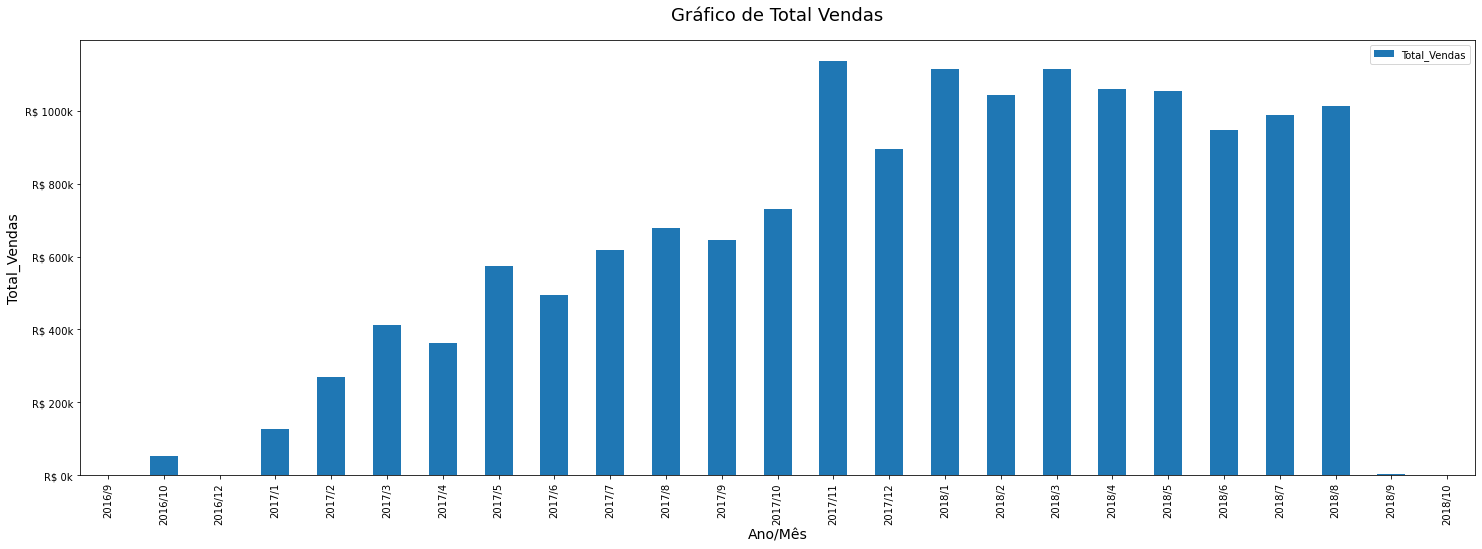

In [50]:
grafico_pgtos = meses_pagtos.plot(kind='bar', x='ano_mes1', y='Total_Vendas', figsize=(25,8))
grafico_pgtos.yaxis.set_major_formatter(formatter)
plt.title('Gráfico de Total Vendas', fontsize=18, pad=20)
plt.xlabel('Ano/Mês', size =14)
plt.ylabel('Total_Vendas', size=14)
plt.show

In [51]:
meses_pagtos.iloc[meses_pagtos[['Total_Vendas']].idxmax()]

,ano,mes,Total_Vendas,ano_mes1
13,2017,11,1136803.92,2017/11


#### 3. Avalie a satisfação dos clientes: a) notas; b) estão realizando comentários?

* Notas: de 1 a 5, onde 5 é muito bom e 1 ruim

In [52]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [53]:
total_notas = order_reviews.groupby('review_score').review_comment_message.count().reset_index()
total_notas

,review_score,review_comment_message
0,1,8745
1,2,2145
2,3,3557
3,4,5976
4,5,20554


In [54]:
Coment_Notas = pd.read_csv ('Tabelas\Tabela_Comentarios_por_Notas.csv')
Coment_Notas

,Total_Ped_Comentados,review_score,Total_Score_feitos,%Comentarios_sobre_Score
0,8745,1,11424,"76,55 %"
1,2145,2,3151,"68,07 %"
2,3557,3,8179,"43,49 %"
3,5976,4,19142,"31,22 %"
4,20554,5,57328,"35,85 %"


#### 4.	Existe algum padrão entre a satisfação do cliente com a entrega antes ou depois do prazo previsto?

* Criando uma coluna nova com a diferença entre a data recebida pelo cliente e a previsão de entrega.
* Além da classificação desta diferença em cinco categorias

In [55]:
orders['Dif_Prev_Realiz_Entrega']= round((orders.order_delivered_customer_date - orders.order_estimated_delivery_date) / np.timedelta64(1,'D'),0)

resultado = []
for value in orders['Dif_Prev_Realiz_Entrega']:
    if (value < 0):
        resultado.append ("Antes")
    elif (value == 0):
        resultado.append ("Pontual")
    elif value < 30:
       resultado.append ("Após até 30 dias")
    elif value >= 31:
        resultado.append("Após acima 31 dias")
    else: 
        resultado.append("Sem entrega")
orders['Realiz_entrega']= resultado

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_entrega,Dif_Prev_Realiz_Entrega,Realiz_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-7.0,Antes
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-5.0,Antes
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-17.0,Antes
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,Antes
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,-9.0,Antes


* Fazendo o cruzamento entre os Datasets orders e orders_review

In [56]:
m_orders_o_reviews = pd.merge(orders, order_reviews, how= 'inner', on = 'order_id')
m_orders_o_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_entrega,Dif_Prev_Realiz_Entrega,Realiz_entrega,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-7.0,Antes,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-5.0,Antes,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,-17.0,Antes,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,Antes,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,-9.0,Antes,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51


In [57]:
m_orders_o_reviews.groupby('review_score').Realiz_entrega.count().reset_index()

,review_score,Realiz_entrega
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [58]:
notas_entrega = m_orders_o_reviews.groupby(['review_score', 'Realiz_entrega']).Dif_Prev_Realiz_Entrega.count().reset_index()
notas_entrega

,review_score,Realiz_entrega,Dif_Prev_Realiz_Entrega
0,1,Antes,5757
1,1,Após acima 31 dias,217
2,1,Após até 30 dias,3291
3,1,Pontual,112
4,1,Sem entrega,32
5,2,Antes,2287
6,2,Após acima 31 dias,16
7,2,Após até 30 dias,584
8,2,Pontual,53
9,2,Sem entrega,1


#### 5.	a) Quais as categorias de produtos mais vendidos? 
####   b) E os menos vendidos? 
####   c) Existe relação com os preços dos itens?     
####   d) A quantidade de fotos impacta nas vendas?

* Fazendo o cruzamento entre os Datasets de orders_items, products e order_payment, após isso a seleção apenas das colunas necessárias.

In [59]:
m_prod = pd.merge(orders_items, products, how= 'left', on= 'product_id')
m_prod_paym = pd.merge(m_prod, order_payment, how='inner', on= 'order_id')
m_prod_paym ['id_pedido_item'] = (m_prod_paym['order_id']).astype(str) + (m_prod_paym['order_item_id']).astype(str)
m_prod_paym = m_prod_paym.drop_duplicates('id_pedido_item')
m_prod_paym

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,id_pedido_item
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1,credit_card,2,72.19,00010242fe8c5a6d1ba2dd792cb162141
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1,credit_card,3,259.83,00018f77f2f0320c557190d7a144bdd31
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1,credit_card,5,216.87,000229ec398224ef6ca0657da4fc703e1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1,credit_card,2,25.78,00024acbcdf0a6daa1e931b038114c751
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1,credit_card,3,218.04,00042b26cf59d7ce69dfabb4e55b4fd91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1,boleto,1,343.40,fffc94f6ce00a00581880bf54a75a0371
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1,boleto,1,386.53,fffcd46ef2263f404302a634eb57f7eb1
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,1,credit_card,3,116.85,fffce4705a9662cd70adb13d4a31832d1
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,1,credit_card,3,64.71,fffe18544ffabc95dfada21779c9644f1


* Criado novo DataFrame com as colunas necessárias para continuar as análises

In [60]:
categ_prod_vendas = pd.DataFrame()
categ_prod_vendas['pedidos'] = m_prod_paym['order_id']
categ_prod_vendas['pedidos_item'] = m_prod_paym['order_item_id']
categ_prod_vendas['id_pedido_item'] = m_prod_paym['id_pedido_item']
categ_prod_vendas['Total_Vendas_PAYM'] = m_prod_paym['payment_value']
categ_prod_vendas['Total_Vendas_Calcul'] = m_prod_paym['price']+ m_prod_paym['freight_value']
categ_prod_vendas['Produto'] = m_prod_paym['product_id']
categ_prod_vendas['Preço'] = m_prod_paym['price']
categ_prod_vendas['Categorias'] = m_prod_paym['product_category_name']
categ_prod_vendas['Frete'] = m_prod_paym['freight_value']
categ_prod_vendas['Qtdade_fotos'] = m_prod_paym['product_photos_qty']

categ_prod_vendas

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos
0,00010242fe8c5a6d1ba2dd792cb16214,1,00010242fe8c5a6d1ba2dd792cb162141,72.19,72.19,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,13.29,4.0
1,00018f77f2f0320c557190d7a144bdd3,1,00018f77f2f0320c557190d7a144bdd31,259.83,259.83,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,19.93,2.0
2,000229ec398224ef6ca0657da4fc703e,1,000229ec398224ef6ca0657da4fc703e1,216.87,216.87,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,17.87,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,00024acbcdf0a6daa1e931b038114c751,25.78,25.78,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,12.79,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,00042b26cf59d7ce69dfabb4e55b4fd91,218.04,218.04,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,18.14,1.0
...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,fffc94f6ce00a00581880bf54a75a0371,343.40,343.40,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas,43.41,3.0
117597,fffcd46ef2263f404302a634eb57f7eb,1,fffcd46ef2263f404302a634eb57f7eb1,386.53,386.53,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios,36.53,1.0
117598,fffce4705a9662cd70adb13d4a31832d,1,fffce4705a9662cd70adb13d4a31832d1,116.85,116.85,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer,16.95,1.0
117599,fffe18544ffabc95dfada21779c9644f,1,fffe18544ffabc95dfada21779c9644f1,64.71,64.71,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios,8.72,1.0


In [61]:
print( m_prod_paym.payment_value.sum())
print ('Total_Vendas_PAYM: '+ categ_prod_vendas.Total_Vendas_PAYM.sum().astype(str))
print ('Total_Vendas_Calcul: ' + categ_prod_vendas.Total_Vendas_Calcul.sum().astype(str))
print ('Diferença: ' + (categ_prod_vendas.Total_Vendas_PAYM.sum() - categ_prod_vendas.Total_Vendas_Calcul.sum()).astype(str))

20000786.470000006
Total_Vendas_PAYM: 20000786.470000006
Total_Vendas_Calcul: 15843409.780000001
Diferença: 4157376.690000005


* Foi escolhido a categoria 'pc_gamer', por ter poucos pedidos, para conferência de valores e entender a dinâmica dos resultados.

In [62]:
categ_prod_vendas.loc[categ_prod_vendas.Categorias == 'pc_gamer']

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos
13536,1d7542bb5262913fe0516f7943b69a58,1,1d7542bb5262913fe0516f7943b69a581,457.38,228.69,6727051471a0fc4a0e7737b57bff2549,219.00,pc_gamer,9.69,3.0
13537,1d7542bb5262913fe0516f7943b69a58,2,1d7542bb5262913fe0516f7943b69a582,457.38,228.69,6727051471a0fc4a0e7737b57bff2549,219.00,pc_gamer,9.69,3.0
19487,2ad4df0af7a71d632dccc0129bee3268,1,2ad4df0af7a71d632dccc0129bee32681,249.42,249.42,dbe520fb381ad695a7e1f2807d20c765,239.00,pc_gamer,10.42,6.0
33285,4821d5af4c2ac98b0f70e47c5d845520,1,4821d5af4c2ac98b0f70e47c5d8455201,69.11,145.07,0105b5323d24fc655f73052694dbbb3a,129.99,pc_gamer,15.08,4.0
34417,4a8493d781a65dfb623103a5dedf44fa,1,4a8493d781a65dfb623103a5dedf44fa1,238.63,238.63,6727051471a0fc4a0e7737b57bff2549,219.00,pc_gamer,19.63,3.0
58966,804e5ddab73def7d5e86b8ae6f27e83b,1,804e5ddab73def7d5e86b8ae6f27e83b1,156.18,156.18,0105b5323d24fc655f73052694dbbb3a,129.99,pc_gamer,26.19,4.0
68166,94f94ebc2e26aeea2aa9e8945cb9fb0c,1,94f94ebc2e26aeea2aa9e8945cb9fb0c1,144.66,144.66,0105b5323d24fc655f73052694dbbb3a,129.99,pc_gamer,14.67,4.0
99279,d7ae3c10c3a4c7a721e64ba401ee745b,2,d7ae3c10c3a4c7a721e64ba401ee745b2,187.56,150.03,0105b5323d24fc655f73052694dbbb3a,129.99,pc_gamer,20.04,4.0
105266,e4aac63ea6f6b75b6d91ead05207fb43,1,e4aac63ea6f6b75b6d91ead05207fb431,138.15,138.15,0105b5323d24fc655f73052694dbbb3a,129.99,pc_gamer,8.16,4.0


In [63]:
categ_prod_vendas[categ_prod_vendas.Categorias == 'pc_gamer'].Total_Vendas_PAYM.sum()

2098.47

In [64]:
categ_prod_vendas[categ_prod_vendas.Categorias == 'pc_gamer'].Total_Vendas_Calcul.sum()

1679.52

In [65]:
categ_prod_vendas.loc[categ_prod_vendas.pedidos == '285c2e15bebd4ac83635ccc563dc71f4']

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos
18402,285c2e15bebd4ac83635ccc563dc71f4,1,285c2e15bebd4ac83635ccc563dc71f41,1.75,40.85,bdc3291ab242ec1effc8eb0987850268,29.0,eletronicos,11.85,1.0


In [66]:
categ_prod_vendas_total = categ_prod_vendas.groupby(['Categorias'])['Total_Vendas_Calcul'].sum().sort_values(ascending=False).reset_index()
categ_prod_vendas_total

,Categorias,Total_Vendas_Calcul
0,beleza_saude,1441104.61
1,relogios_presentes,1305541.61
2,cama_mesa_banho,1241681.72
3,esporte_lazer,1156656.48
4,informatica_acessorios,1059272.40
...,...,...
68,flores,1598.91
69,casa_conforto_2,1170.58
70,cds_dvds_musicais,954.99
71,fashion_roupa_infanto_juvenil,665.36


5.	a) Quais as categorias de produtos mais vendidos? 

In [67]:
categ_prod_vendas_total.nlargest(5, 'Total_Vendas_Calcul')

,Categorias,Total_Vendas_Calcul
0,beleza_saude,1441104.61
1,relogios_presentes,1305541.61
2,cama_mesa_banho,1241681.72
3,esporte_lazer,1156656.48
4,informatica_acessorios,1059272.40


5.	b) E os menos vendidos? 

In [68]:
categ_prod_vendas_total.nsmallest(5, 'Total_Vendas_Calcul', keep='last')

,Categorias,Total_Vendas_Calcul
72,seguros_e_servicos,324.51
71,fashion_roupa_infanto_juvenil,665.36
70,cds_dvds_musicais,954.99
69,casa_conforto_2,1170.58
68,flores,1598.91


In [69]:
categ_prod_vendas[categ_prod_vendas.Categorias == 'flores']

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos
1218,02c371100bf54facae80322579c7fefb,1,02c371100bf54facae80322579c7fefb1,59.24,59.24,3104dbf304c25fa1812a11ad924f8b57,49.90,flores,9.34,1.0
5180,0b4e6da2eae282f0a0072085c7adacfe,1,0b4e6da2eae282f0a0072085c7adacfe1,38.91,38.91,7620a27f1d6747511f1c6f0ddb63c0ef,22.80,flores,16.11,1.0
7244,0fcb1b4cfdb2f127f9ae4d732352dfc7,1,0fcb1b4cfdb2f127f9ae4d732352dfc71,43.60,43.60,7620a27f1d6747511f1c6f0ddb63c0ef,29.89,flores,13.71,1.0
24048,3489314598632acec4c8a6aee1c781ce,1,3489314598632acec4c8a6aee1c781ce1,46.30,46.30,94656ce34a307d26e23011bb25148c9e,31.20,flores,15.10,1.0
29796,40db427de195f02042ceecb84dfaa2f1,1,40db427de195f02042ceecb84dfaa2f11,140.70,70.35,065554bfe0244b9f5f6414f332106a21,54.00,flores,16.35,1.0
29797,40db427de195f02042ceecb84dfaa2f1,2,40db427de195f02042ceecb84dfaa2f12,140.70,70.35,065554bfe0244b9f5f6414f332106a21,54.00,flores,16.35,1.0
47029,66292e4801140d67f953827d8ed810d8,1,66292e4801140d67f953827d8ed810d81,38.91,38.91,7620a27f1d6747511f1c6f0ddb63c0ef,22.80,flores,16.11,1.0
47317,66b5056a7febb8679fd88a5b42d59b05,1,66b5056a7febb8679fd88a5b42d59b051,31.71,31.71,e89607ddfcf953bc7a85adaca52e122a,15.60,flores,16.11,1.0
52589,721fa08ba1208bce0d5642af802d2586,1,721fa08ba1208bce0d5642af802d25861,35.72,35.72,5127baa26f9d08000b80cc8b063fcd89,16.40,flores,19.32,1.0
55941,79b5579acdaecb745610365f3f181fce,1,79b5579acdaecb745610365f3f181fce1,77.63,77.63,be0e6c61c2bcdd9a4d022ba67fd66189,65.90,flores,11.73,2.0


5.  c) Existe relação com os preços dos itens? 

In [70]:
categ_prod_vendas_media = categ_prod_vendas.groupby(['Categorias']).agg({'Total_Vendas_Calcul': 'sum', 'Preço': 'mean', 'Qtdade_fotos': 'mean'}).sort_values('Total_Vendas_Calcul',ascending=False).reset_index()
categ_prod_vendas_media = round(categ_prod_vendas_media, 1)
categ_prod_vendas_media.nlargest(5, 'Total_Vendas_Calcul')



,Categorias,Total_Vendas_Calcul,Preço,Qtdade_fotos
0,beleza_saude,1441104.6,130.2,1.8
1,relogios_presentes,1305541.6,201.1,2.5
2,cama_mesa_banho,1241681.7,93.3,1.5
3,esporte_lazer,1156656.5,114.3,2.2
4,informatica_acessorios,1059272.4,116.5,1.7


In [71]:
#Média de Preço dos produtos 
print('Média de Preço geral dos produtos: ')
print(round(categ_prod_vendas.Preço.mean(),2))
print('Maior média de preço: ')
print(round(categ_prod_vendas_media.Preço.max(),2))

Média de Preço geral dos produtos: 
120.66
Maior média de preço: 
1098.3


In [72]:
# Categoria com o maior preço e sua média de fotos.
categ_prod_vendas_media.iloc[categ_prod_vendas_media[['Preço']].idxmax()]

,Categorias,Total_Vendas_Calcul,Preço,Qtdade_fotos
17,pcs,232799.4,1098.3,2.9


A média de preço por categoria não ficou muito mais alta do que a média de preço dos produtos em geral. A partir da terceira até a quinta posição, das categorias mais vendidas, temos a média de preço mais baixa do que a geral. Indicando que os clientes não buscam apenas produtos de baixo valor. 

5. d) A quantidade de fotos impacta nas vendas?

* Classificação das categorias pelo número de fotos (média)

In [73]:
categ_prod_vendas_media.nlargest(5, 'Qtdade_fotos')

,Categorias,Total_Vendas_Calcul,Preço,Qtdade_fotos
43,fashion_calcados,28481.6,89.9,5.2
36,portateis_casa_forno_e_cafe,50193.6,624.3,4.2
67,pc_gamer,1679.5,171.8,3.9
21,fashion_bolsas_e_acessorios,184273.5,75.2,3.7
65,artes_e_artesanato,2184.1,75.6,3.7


A quantidade de fotos não impacta diretamente nas vendas, nesta avaliação incial, as categorias com uma média maior de quantidade de fotos não tiveram vendas tão significativas como as top 5. E por sua vez as cinco categorias com maior volume de vendas tem uma média de aproximadamente duas fotos. A foto é sim essencial para o cliente conhecer o produto, mas na minha opinião a quantidade de fotos não resulta em um aumento direto nas vendas. O que não significa que o produto sem foto vende também, normalmente os clientes rejeitam os produtos sem foto nenhuma, por esse motivo a plataforma exige uma foto do produto.

    * Todos os produtos vendidos possuíam ao menos uma foto.

In [74]:
categ_prod_vendas[categ_prod_vendas.Qtdade_fotos == 0]

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos


#### 6.	O volume e o peso dos produtos impactam no valor do frete?

* Criação das colunas 'Volume_Prod_m3', 'Peso_Prod_kg', 'Peso_Cubado_kg' para a análise

In [75]:
categ_prod_vendas ['Volume_Prod_m3'] = (m_prod_paym['product_length_cm'] * m_prod_paym['product_height_cm'] * m_prod_paym['product_width_cm']) * 0.000001
categ_prod_vendas ['Peso_Prod_kg'] = m_prod_paym['product_weight_g']/1000
categ_prod_vendas ['Peso_Cubado_kg'] = categ_prod_vendas ['Volume_Prod_m3']*300
categ_prod_vendas

,pedidos,pedidos_item,id_pedido_item,Total_Vendas_PAYM,Total_Vendas_Calcul,Produto,Preço,Categorias,Frete,Qtdade_fotos,Volume_Prod_m3,Peso_Prod_kg,Peso_Cubado_kg
0,00010242fe8c5a6d1ba2dd792cb16214,1,00010242fe8c5a6d1ba2dd792cb162141,72.19,72.19,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,13.29,4.0,0.003528,0.650,1.0584
1,00018f77f2f0320c557190d7a144bdd3,1,00018f77f2f0320c557190d7a144bdd31,259.83,259.83,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,19.93,2.0,0.060000,30.000,18.0000
2,000229ec398224ef6ca0657da4fc703e,1,000229ec398224ef6ca0657da4fc703e1,216.87,216.87,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,17.87,2.0,0.014157,3.050,4.2471
3,00024acbcdf0a6daa1e931b038114c75,1,00024acbcdf0a6daa1e931b038114c751,25.78,25.78,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,12.79,1.0,0.002400,0.200,0.7200
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,00042b26cf59d7ce69dfabb4e55b4fd91,218.04,218.04,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,18.14,1.0,0.042000,3.750,12.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,fffc94f6ce00a00581880bf54a75a0371,343.40,343.40,4aa6014eceb682077f9dc4bffebc05b0,299.99,utilidades_domesticas,43.41,3.0,0.053400,10.150,16.0200
117597,fffcd46ef2263f404302a634eb57f7eb,1,fffcd46ef2263f404302a634eb57f7eb1,386.53,386.53,32e07fd915822b0765e448c4dd74c828,350.00,informatica_acessorios,36.53,1.0,0.044460,8.950,13.3380
117598,fffce4705a9662cd70adb13d4a31832d,1,fffce4705a9662cd70adb13d4a31832d1,116.85,116.85,72a30483855e2eafc67aee5dc2560482,99.90,esporte_lazer,16.95,1.0,0.009576,0.967,2.8728
117599,fffe18544ffabc95dfada21779c9644f,1,fffe18544ffabc95dfada21779c9644f1,64.71,64.71,9c422a519119dcad7575db5af1ba540e,55.99,informatica_acessorios,8.72,1.0,0.008000,0.100,2.4000


* Calculando os valores médios do Frete, Volume_Prod_m3 e Peso_Prod_kg para compara com o total de vendas das 5 categorias mais vendidas.

In [76]:
categ_prod_frete = categ_prod_vendas.groupby('Categorias').agg({'Total_Vendas_Calcul': 'sum', 'Preço' : 'mean','Frete': 'mean',  'Peso_Prod_kg': 'mean', 'Peso_Cubado_kg': 'mean', 'Volume_Prod_m3': 'mean'}).sort_values('Total_Vendas_Calcul',ascending=False).reset_index()
categ_prod_frete = round(categ_prod_frete, 2)
categ_prod_frete ['%_Frete_sobre_Preço'] = round(((categ_prod_frete['Frete']/ categ_prod_frete['Preço'])*100),2)
categ_prod_frete

,Categorias,Total_Vendas_Calcul,Preço,Frete,Peso_Prod_kg,Peso_Cubado_kg,Volume_Prod_m3,%_Frete_sobre_Preço
0,beleza_saude,1441104.61,130.19,18.88,1.05,2.48,0.01,14.50
1,relogios_presentes,1305541.61,201.14,16.78,0.58,0.86,0.00,8.34
2,cama_mesa_banho,1241681.72,93.30,18.42,2.12,4.99,0.02,19.74
3,esporte_lazer,1156656.48,114.34,19.51,1.74,4.07,0.01,17.06
4,informatica_acessorios,1059272.40,116.51,18.82,0.90,1.66,0.01,16.15
...,...,...,...,...,...,...,...,...
68,flores,1598.91,33.64,14.81,1.83,1.66,0.01,44.02
69,casa_conforto_2,1170.58,25.34,13.68,0.83,9.24,0.03,53.99
70,cds_dvds_musicais,954.99,52.14,16.07,0.55,3.94,0.01,30.82
71,fashion_roupa_infanto_juvenil,665.36,71.23,11.94,0.26,2.18,0.01,16.76


- As empresas de transporte calculam o frete verificando o peso e o volume do produto com a embalagem, ou pelo peso cubado. 
Porque alguns produtos podem ser pequenos nas dimensões, mas pesados ou podem ser grandes, com volume maior, mas leves. Nestes casos é usado o peso cubado.
Basicamente é comparado o peso com o peso cubado, e prevalece o maior para o cálculo do frete.
Analisando as médias dos volumes e pesos por cada categoria, vemos que os volumes são baixos, assim como os pesos. 
Entretanto os pesos cubados já se alteram um pouco mais, mas mantêm a faixa de preço de frete médio. 
Lembrando que aqui se tratam de valores médios e poderia ser feita uma análise mais aprofundada dentro de cada categoria.
Podemos analisar também o impacto do frete sobre o preço do produto. 


#### 7.	Avaliação/Visualização da posição geográfica onde se encontra a maior concentração de clientes e vendedores.

##### Preparação

* Fazendo o cruzamento dos datasets necessários para responder esta demanda.

In [77]:
orders_resumo = pd.DataFrame()
orders_resumo = orders[['order_id', 'customer_id', 'tempo_entrega', 'Realiz_entrega']]
orders_resumo

,order_id,customer_id,tempo_entrega,Realiz_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,Antes
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,Antes
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,Antes
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,Antes
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,Antes
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8.0,Antes
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,Antes
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,25.0,Antes
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes


In [78]:
m_orders_cus = pd.merge(orders_resumo, customers, how= 'inner', on= 'customer_id')
m_orders_cus

,order_id,customer_id,tempo_entrega,Realiz_entrega,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,Antes,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,Antes,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,Antes,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,Antes,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,Antes,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,8.0,Antes,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,Antes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,25.0,Antes,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [79]:
m_orders_cus['customer_id'].nunique()

99441

In [80]:
orders_items_resumo = pd.DataFrame()
orders_items_resumo = orders_items[['order_id', 'seller_id']]
orders_items_resumo

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [81]:
m_ord_cus_o_item = pd.merge(m_orders_cus, orders_items_resumo, how= 'left', on= 'order_id')
m_ord_cus_o_item

,order_id,customer_id,tempo_entrega,Realiz_entrega,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,Antes,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,Antes,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,Antes,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,Antes,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,Antes,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,Antes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1f9ab4708f3056ede07124aad39a2554
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,25.0,Antes,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,d50d79cb34e38265a8649c383dcffd48
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48


In [82]:
m_ord_cus_o_item['seller_id'].nunique()

3095

In [83]:
m_ord_cus_o_item['customer_id'].nunique()

99441

In [84]:
m_ord_cus_o_it_sell = pd.merge(m_ord_cus_o_item, sellers, how= 'left', on= 'seller_id' )
m_ord_cus_o_it_sell

,order_id,customer_id,tempo_entrega,Realiz_entrega,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,Antes,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,Antes,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,289cdb325fb7e7f891c38608bf9e0962,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,Antes,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,Antes,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,66922902710d126a0e7d26b0e3805106,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,Antes,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2c9e548be18521d1c43cde1c582c6de8,8752.0,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,Antes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1f9ab4708f3056ede07124aad39a2554,17602.0,tupa,SP
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,25.0,Antes,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,d50d79cb34e38265a8649c383dcffd48,8290.0,sao paulo,SP
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG


In [85]:
m_ord_cus_o_it_sell['seller_id'].nunique()

3095

In [86]:
m_ord_cus_o_it_sell['customer_id'].nunique()

99441

In [87]:
cust_sell = m_ord_cus_o_it_sell.groupby('customer_state').agg({'seller_id': pd.Series.nunique, 'customer_id' : pd.Series.nunique}).reset_index()
cust_sell

,customer_state,seller_id,customer_id
0,AC,71,81
1,AL,252,413
2,AM,118,148
3,AP,63,68
4,BA,967,3380
5,CE,528,1336
6,DF,786,2140
7,ES,738,2033
8,GO,724,2020
9,MA,375,747


In [88]:
cust_sell.sum()

customer_state    ACALAMAPBACEDFESGOMAMGMSMTPAPBPEPIPRRJRNRORRRS...
seller_id                                                     17567
customer_id                                                   99441
dtype: object

In [89]:
sell = m_ord_cus_o_it_sell.groupby('seller_state')['seller_id'].nunique().reset_index()
sell

,seller_state,seller_id
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


In [90]:
sell.sum()

seller_state    ACAMBACEDFESGOMAMGMSMTPAPBPEPIPRRJRNRORSSCSESP
seller_id                                                 3095
dtype: object

In [91]:
cus = m_ord_cus_o_it_sell.groupby('customer_state')['customer_id'].nunique().reset_index()
cus

,customer_state,customer_id
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [92]:
cus.sum()

customer_state    ACALAMAPBACEDFESGOMAMGMSMTPAPBPEPIPRRJRNRORRRS...
customer_id                                                   99441
dtype: object

7.	Avaliação/Visualização da posição geográfica onde se encontra a maior concentração de clientes e vendedores.

In [93]:
m_cust_sell = pd.merge(cus, sell, how= 'left', left_on='customer_state', right_on='seller_state')
m_cust_sell = m_cust_sell.drop(columns=['seller_state'])
m_cust_sell = m_cust_sell.sort_values(by='customer_id', ascending= False )
m_cust_sell

,customer_state,customer_id,seller_id
25,SP,41746,1849.0
18,RJ,12852,171.0
10,MG,11635,244.0
22,RS,5466,129.0
17,PR,5045,349.0
23,SC,3637,190.0
4,BA,3380,19.0
6,DF,2140,30.0
7,ES,2033,23.0
8,GO,2020,40.0


In [94]:
m_cust_sell.sum()

customer_state    SPRJMGRSPRSCBADFESGOPECEPAMTMAMSPBPIRNALSETORO...
customer_id                                                   99441
seller_id                                                    3095.0
dtype: object

In [95]:
tab_estados = pd.read_csv('D:\Harve Residencia Tech\Projetos\Projeto Olist\Projeto Olist Script\Tabelas\Tabela_estados.csv', sep= ';')
tab_estados

,Sigla,latitude,longitude
0,AC,-8.77,-70.55
1,AL,-9.71,-35.73
2,AP,-3.07,-61.66
3,AM,1.41,-51.77
4,BA,-12.96,-38.51
5,CE,-3.71,-38.54
6,DF,-15.83,-47.86
7,ES,-19.19,-40.34
8,GO,-16.64,-49.31
9,MA,-2.55,-44.30


In [96]:
m_est_cus_sell = pd.merge(m_cust_sell, tab_estados, how= 'inner', left_on='customer_state', right_on= 'Sigla' )
m_est_cus_sell

,customer_state,customer_id,seller_id,Sigla,latitude,longitude
0,SP,41746,1849.0,SP,-10.90,-37.07
1,RJ,12852,171.0,RJ,-22.84,-43.15
2,MG,11635,244.0,MG,-18.10,-44.38
3,RS,5466,129.0,RS,-11.22,-62.80
4,PR,5045,349.0,PR,-24.89,-51.55
5,SC,3637,190.0,SC,-27.33,-49.44
6,BA,3380,19.0,BA,-12.96,-38.51
7,DF,2140,30.0,DF,-15.83,-47.86
8,ES,2033,23.0,ES,-19.19,-40.34
9,GO,2020,40.0,GO,-16.64,-49.31


In [97]:
file_name = 'D:\Harve Residencia Tech\Projetos\Projeto Olist\Projeto Olist Script\Tabelas\Customer_Seller_estados.csv'
m_est_cus_sell.to_csv(file_name)
print('ok')

ok


#### 8.	As entregas atrasadas aconteceram entre vendedores/compradores de estados diferentes?

In [98]:
m_ord_cus_o_it_sell

,order_id,customer_id,tempo_entrega,Realiz_entrega,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,Antes,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,Antes,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,289cdb325fb7e7f891c38608bf9e0962,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,Antes,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,Antes,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,66922902710d126a0e7d26b0e3805106,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,3.0,Antes,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2c9e548be18521d1c43cde1c582c6de8,8752.0,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,22.0,Antes,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1f9ab4708f3056ede07124aad39a2554,17602.0,tupa,SP
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,25.0,Antes,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,d50d79cb34e38265a8649c383dcffd48,8290.0,sao paulo,SP
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,17.0,Antes,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,a1043bafd471dff536d0c462352beb48,37175.0,ilicinea,MG


In [99]:
entregas_cus_sell = pd.DataFrame()
entregas_cus_sell = m_ord_cus_o_it_sell [['order_id', 'customer_id', 'customer_state', 'seller_id', 'seller_state' ,'tempo_entrega', 'Realiz_entrega']]
entregas_cus_sell.head()

,order_id,customer_id,customer_state,seller_id,seller_state,tempo_entrega,Realiz_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,3504c0cb71d7fa48d967e0e4c94d59d9,SP,8.0,Antes
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,BA,289cdb325fb7e7f891c38608bf9e0962,SP,13.0,Antes
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,GO,4869f7a5dfa277a7dca6462dcf3b52b2,SP,9.0,Antes
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,RN,66922902710d126a0e7d26b0e3805106,MG,13.0,Antes
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,SP,2c9e548be18521d1c43cde1c582c6de8,SP,3.0,Antes


In [100]:
mesmo_estado = []
for i, valor in enumerate(entregas_cus_sell['customer_state']):
    if( valor == entregas_cus_sell['seller_state'][i]):
        mesmo_estado.append(0)
    else:
        mesmo_estado.append(1)
entregas_cus_sell['Entregas_mesmo_estado'] = mesmo_estado
entregas_cus_sell

C:\Users\llanz\AppData\Local\Temp\ipykernel_26864\3903069733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas_cus_sell['Entregas_mesmo_estado'] = mesmo_estado


,order_id,customer_id,customer_state,seller_id,seller_state,tempo_entrega,Realiz_entrega,Entregas_mesmo_estado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,SP,3504c0cb71d7fa48d967e0e4c94d59d9,SP,8.0,Antes,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,BA,289cdb325fb7e7f891c38608bf9e0962,SP,13.0,Antes,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,GO,4869f7a5dfa277a7dca6462dcf3b52b2,SP,9.0,Antes,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,RN,66922902710d126a0e7d26b0e3805106,MG,13.0,Antes,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,SP,2c9e548be18521d1c43cde1c582c6de8,SP,3.0,Antes,0
...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,SP,1f9ab4708f3056ede07124aad39a2554,SP,22.0,Antes,0
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,BA,d50d79cb34e38265a8649c383dcffd48,SP,25.0,Antes,1
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,RJ,a1043bafd471dff536d0c462352beb48,MG,17.0,Antes,1
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,RJ,a1043bafd471dff536d0c462352beb48,MG,17.0,Antes,1


9.	Identificar o padrão dos clientes (localização, método de pagamento, quantidade de parcelas, entrega antes da previsão, notas de satisfação média, tipos de produtos) que fizeram uma recompra no site